### Importing libraries

In [1]:
#python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_precision_recall_curve, accuracy_score, roc_auc_score, log_loss
import warnings
warnings.filterwarnings("ignore")

### Data loading

In [2]:
#pip install catboost

In [3]:
data = pd.read_csv('seismic_bumps.csv')
data.head() 

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


#### Attribute information:
1. seismic: shift seismic hazard in the coal mine obtained by the seismic; hazard state as(a : lack, b : low, c : high, d : danger state);
2. seismoacoustic: shift seismic hazard  in the coal mine obtained by the this method;
3. shift: type of a shift (W : coal-getting, N : preparation shift);
4. genergy: energy recorded within shift previously using most active GMax 
5. gpuls: number of pulses recorded  by GMax within previous shift;
6. gdenergy: deviation of energy recorded by GMax from average
during eight previous shifts
7. gdpuls: deviation of number of pulses
8. ghazard: shift seismic hazard assessment in the coal mine based on registration from GMax
9. nbumps: number of seismic bumps
10. nbumps2: number of seismic bumps (in energy range [10^2,10^3)) 
11. nbumps3: number of seismic bumps (in energy range [10^3,10^4)) 
12. nbumps4: number of seismic bumps (in energy range [10^4,10^5))
13. nbumps5: number of seismic bumps (in energy range [10^5,10^6))
14. nbumps6: number of seismic bumps (in energy range [10^6,10^7))
15. nbumps7: number of seismic bumps (in energy range [10^7,10^8))
16. nbumps89: number of seismic bumps (in energy range [10^8,10^10))
17. energy: total energy of seismic bumps
18. maxenergy: maximum energy of the seismic bumps
19. class: 1; seismic bumps leads to hazardous state or 0; Non hazardous state

In [4]:
#number of instances and atttributes
data.shape

(2584, 19)

### Dataset basic information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   ghazard         2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9    nbumps2        2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

Some attributes are of object type that means it contains string values so these are needed to be encoded

In [6]:
data.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


A brief description of data is given above with its mean, min-max values, and other statiscal measures.

In [7]:
#Observing null values, if any.
data.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
 nbumps2          0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

This null value count represents that the dataset is free from noise; null value are not there. 

### EDA: Exploratory Data Analysis

##### Observing target feature

0    2414
1     170
Name: class, dtype: int64


Text(0, 0.5, 'count')

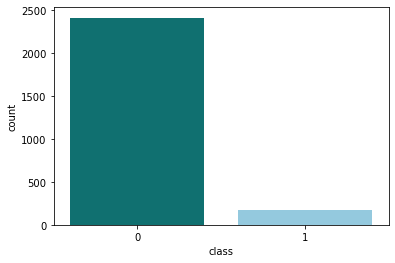

In [8]:
#examining target feature
print(data['class'].value_counts())

#count plot of each class in target feature
sns.countplot(x=data['class'], palette=['teal', 'skyblue'])
plt.xlabel('class')
plt.ylabel('count')

This represents that the target feature is having binary values; 0 and 1 representing Non-hazardous state and hazardous state, respectively.

Observing that, we can say that instances of Non-hazardous state are more than instances of hazardous state.

##### Observing features via pearson correlation matrix

<AxesSubplot:>

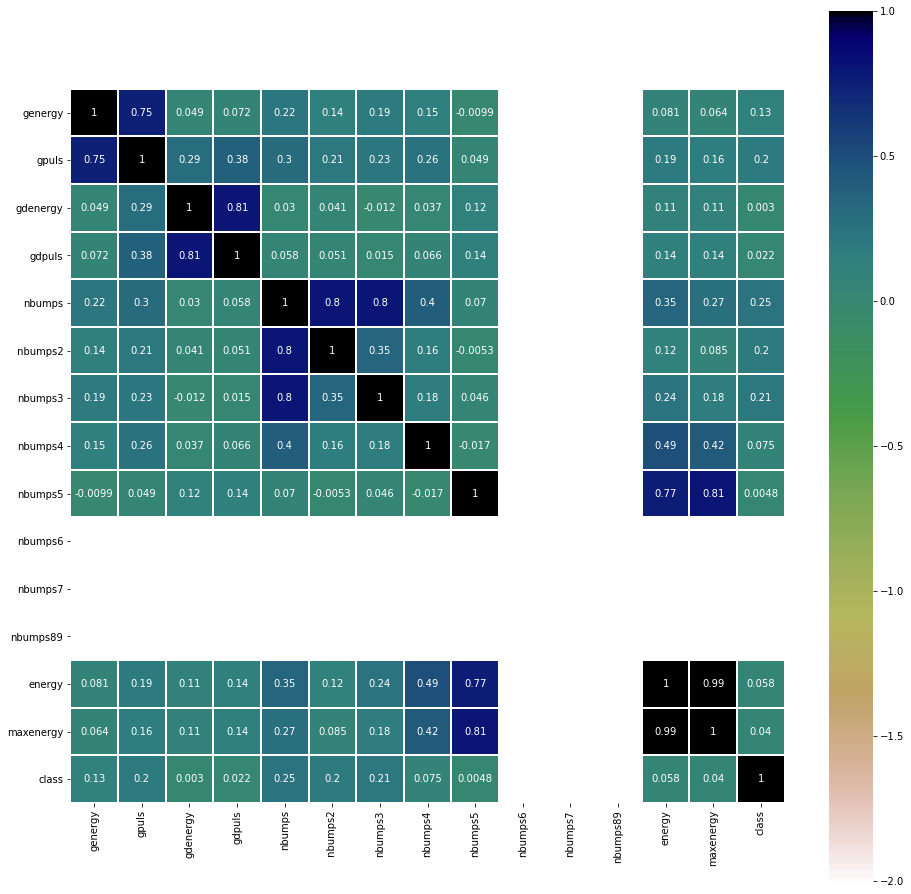

In [9]:
#Pearson's correlation matrix
plt.figure(figsize=(16,16))
sns.heatmap(data=data.corr(), vmax=1, vmin=-2, cmap='gist_earth_r', square=True, annot=True, linewidths=1)

In the above heatmap, it is observed that genergy and gpuls are strongly correlated along with gdenergy and gdpuls. Energy and maxenergy are seem to be perfectly correlated due to having high correlation coefficient values.

On the other side, 'nbumps6', 'nbumps7', and 'nbumps89' are least correlated, therefore these can be removed.



##### Countplots of some all attributes

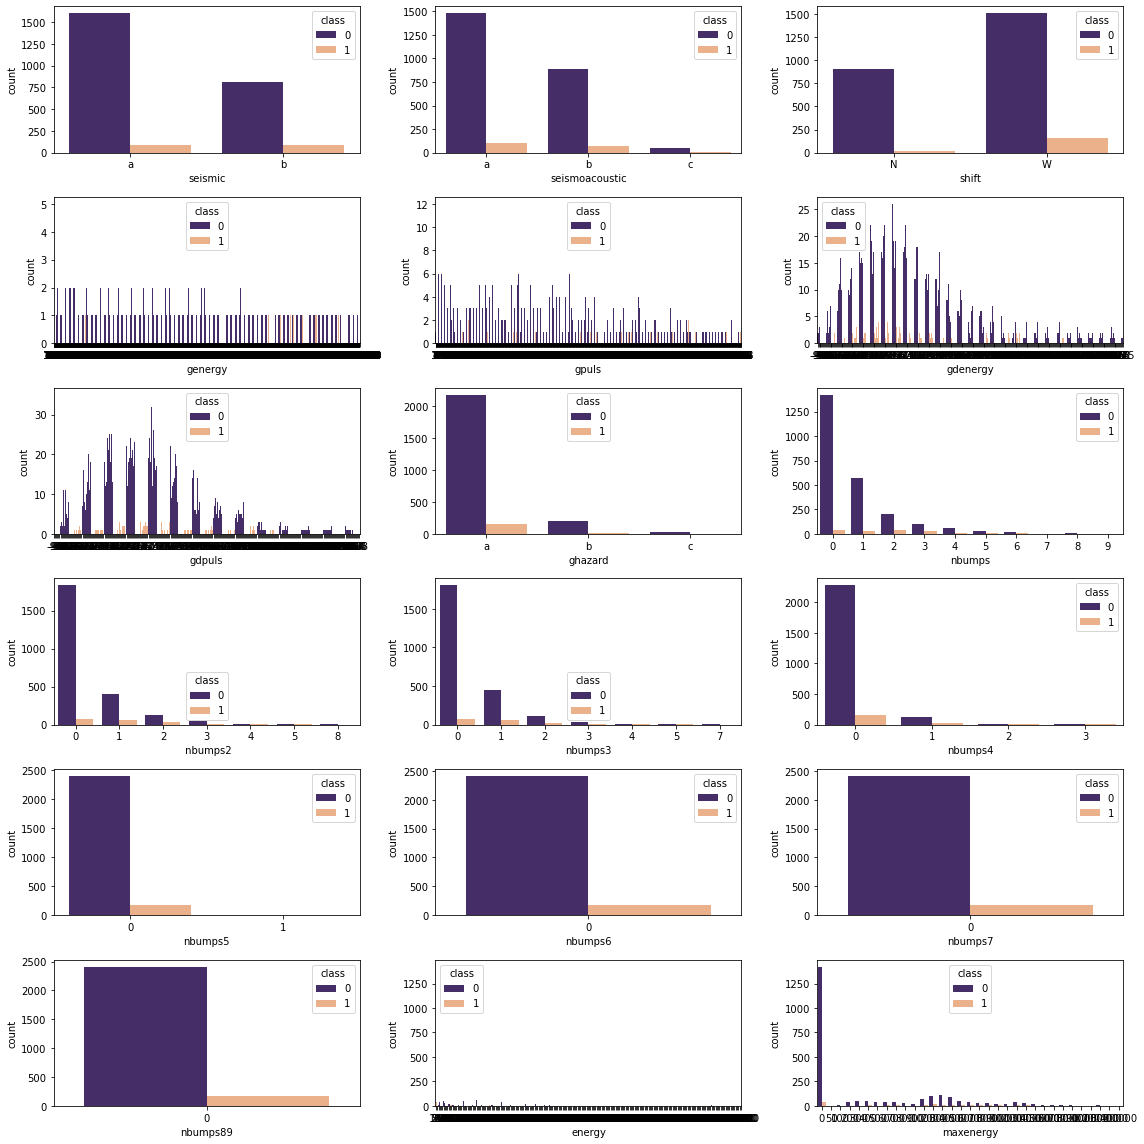

In [10]:
#countplots of attributes
columns = [col for col in data.columns if col!='class']
plt.figure(figsize = (16,16))
for i, col in enumerate(columns):
    plt.subplot(6, 3, i+1)
    sns.countplot(x = col, data = data, palette=['#432371',"#FAAE7B"], hue = 'class')
    plt.tight_layout()

Here, 'nbumps6', 'nbumps7', and 'nbumps89' are having all zeros therefore these can be treated as ordinal attributes. These are required to be removed from the data so as to avoid irrelevant data




##### Distplots to observe data skewness and distibution

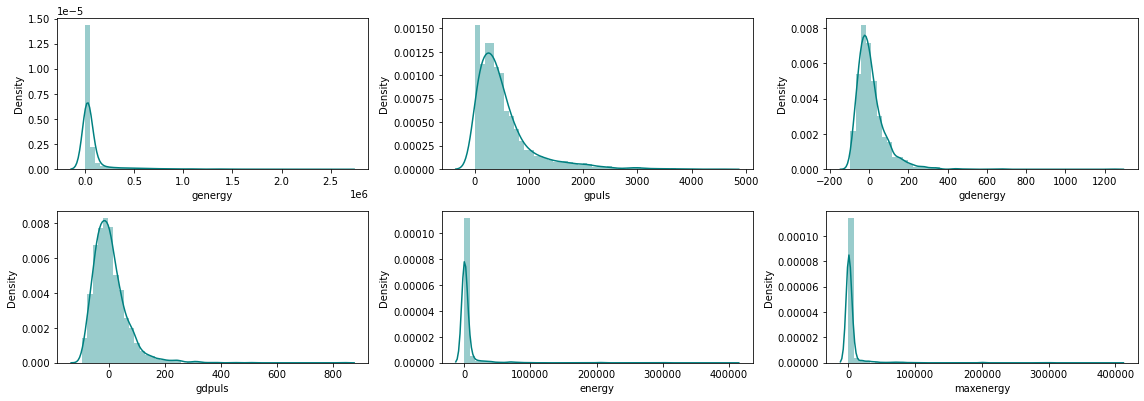

In [11]:
plt.figure(figsize = (16,16))
for i, col in enumerate(['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']):
    plt.subplot(6, 3, i+1)
    sns.distplot(data[col], hist=True, color='teal')
    plt.tight_layout()

It can be seen clearly that dataset, on the basis of all continuous attributes, is properly righlty skewed.

Also, the values of continuous attributes ranges from 0-40000 approximately.

### Cleaning of Data

After exploring dataset using some plots and visuals, some tranformations and cleaning is required.

In [12]:
#removing 'nbumps6', 'nbumps7', and 'nbumps89' features due to having only 1 category of class
data =data.drop(columns=['nbumps6', 'nbumps7', 'nbumps89'], axis=1)

##### Label Encoding and Scaling

In [13]:
# Label Encoding of features of object dtype
for col in data.columns:
  if data[col].dtype=='O':
    data[col] = LabelEncoder().fit_transform(data[col])
  
#data info after encoding

In [14]:
#Standard Scaling over continuous features to adjust values inside some fixed range
for col in ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']:
  data[col] = StandardScaler().fit_transform(data[[col]])

#scaled data looks like
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,0,0,0,-0.327561,-0.872073,-1.050711,-1.211459,0,0,0,0,0,0,-0.243327,-0.221087,0
1,0,0,0,-0.329568,-0.898738,-1.025805,-1.322299,0,1,0,1,0,0,-0.145512,-0.117747,0
2,0,0,0,-0.358675,-0.904071,-1.162786,-1.306465,0,0,0,0,0,0,-0.243327,-0.221087,0
3,0,0,0,-0.268038,-0.653424,-0.440526,0.561974,0,1,0,1,0,0,-0.096605,-0.066078,0
4,0,0,0,-0.338645,-0.856075,-0.938636,-0.894775,0,0,0,0,0,0,-0.243327,-0.221087,0


### Splitting data into X and y and Principal Component Analysis
X: Set of indepedent features
y: Dependent features; class

In [15]:
X = data.drop('class', axis=1)
y = data['class']

In [16]:
#splitting data into train and test sets with ratio 80% and 20%, repsectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
#PCA to reduce the dimensionality of data
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = pd.DataFrame(X_train, columns=['PC'+str(i+1) for i in range(10)])

#data with 10 Principle components that holds most of the information
X_train.shape, y_train.shape

((2067, 10), (2067,))

### Models

#### Algorithm 1: Random Forest Classifier

In [18]:
#model with Random Forest Classifier
model1 = RandomForestClassifier()

#training 
model1.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
#prediction
model1_pred =  model1.predict(X_test)

#### Random Forest's Performance

In [20]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, model1_pred))
print('ACCURACY SCORE: ', accuracy_score(y_test, model1_pred))
print('LOG LOSS: ', log_loss(y_test, model1.predict_proba(X_test)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       483
           1       0.50      0.03      0.06        34

    accuracy                           0.93       517
   macro avg       0.72      0.51      0.51       517
weighted avg       0.91      0.93      0.91       517

ACCURACY SCORE:  0.9342359767891683
LOG LOSS:  0.5072257692764646


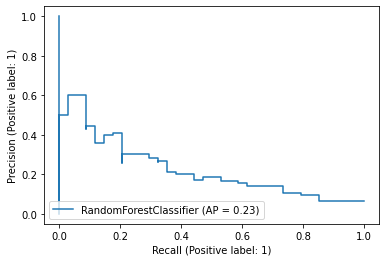

In [21]:
#precision recall curve
plot_precision_recall_curve(estimator=model1, X=X_test, y=y_test)

the precision-recall curve is describing the high area under curve showing high precision and recall values which states low false positive and low false negative rates.

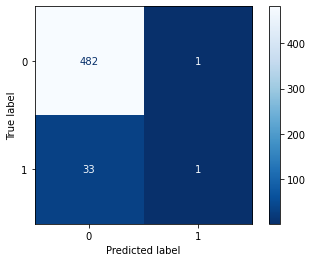

In [22]:
#confusion matrix
plot_confusion_matrix(estimator=model1, X=X_test, y_true=y_test, cmap='Blues_r')

The confusion matrix of this classifier is showing great results with less false predicted values.

#### Algorithm 2: Logistic Regression

In [23]:
#model with Logistic Regression Classifier
model2 = LogisticRegression()

#training 
model2.fit(X_train, y_train)

LogisticRegression()

In [24]:
#prediction
model2_pred =  model2.predict(X_test)

#### Logistic Regression's Performance

In [25]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, model2_pred))
print('ACCURACY SCORE: ', accuracy_score(y_test, model2_pred))
print('LOG LOSS: ', log_loss(y_test, model2.predict_proba(X_test)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       483
           1       0.25      0.03      0.05        34

    accuracy                           0.93       517
   macro avg       0.59      0.51      0.51       517
weighted avg       0.89      0.93      0.90       517

ACCURACY SCORE:  0.9303675048355899
LOG LOSS:  0.21040953044329763


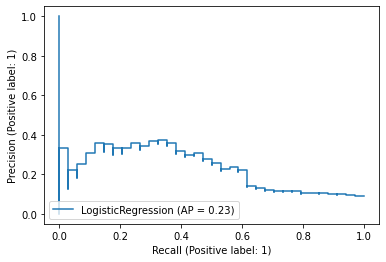

In [26]:
#precision recall curve
plot_precision_recall_curve(estimator=model2, X=X_test, y=y_test)

the precision-recall curve of this model is describing the comparatively low area under curve showing comparatively lower  precision and recall values which states some false positive and false negative rates.

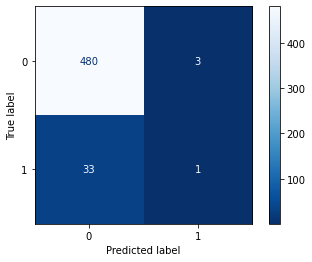

In [27]:
#confusion matrix
plot_confusion_matrix(estimator=model2, X=X_test, y_true=y_test, cmap='Blues_r')

The confusion matrix of this classifier is showing comparatively greater false predicted values.

#### Algorithm 3: Catboost Classifier

In [28]:
#model with Catboost Classifier
model3 = CatBoostClassifier()

#training 
model3.fit(X_train, y_train)

Learning rate set to 0.014047
0:	learn: 0.6741526	total: 59.6ms	remaining: 59.5s
1:	learn: 0.6552077	total: 61.2ms	remaining: 30.5s
2:	learn: 0.6364943	total: 62.5ms	remaining: 20.8s
3:	learn: 0.6188626	total: 63.8ms	remaining: 15.9s
4:	learn: 0.6045588	total: 65.2ms	remaining: 13s
5:	learn: 0.5904408	total: 66.3ms	remaining: 11s
6:	learn: 0.5753959	total: 67.8ms	remaining: 9.62s
7:	learn: 0.5618662	total: 69.3ms	remaining: 8.59s
8:	learn: 0.5492146	total: 71.2ms	remaining: 7.84s
9:	learn: 0.5354750	total: 72.7ms	remaining: 7.2s
10:	learn: 0.5219430	total: 74.1ms	remaining: 6.66s
11:	learn: 0.5104339	total: 76.1ms	remaining: 6.27s
12:	learn: 0.4987032	total: 77.4ms	remaining: 5.88s
13:	learn: 0.4873430	total: 78.8ms	remaining: 5.55s
14:	learn: 0.4764050	total: 80.3ms	remaining: 5.27s
15:	learn: 0.4653148	total: 81.4ms	remaining: 5.01s
16:	learn: 0.4548670	total: 83.1ms	remaining: 4.8s
17:	learn: 0.4457427	total: 84.7ms	remaining: 4.62s
18:	learn: 0.4360307	total: 86.6ms	remaining: 4.47

226:	learn: 0.1577954	total: 383ms	remaining: 1.3s
227:	learn: 0.1576016	total: 384ms	remaining: 1.3s
228:	learn: 0.1573051	total: 386ms	remaining: 1.3s
229:	learn: 0.1571046	total: 387ms	remaining: 1.29s
230:	learn: 0.1568294	total: 388ms	remaining: 1.29s
231:	learn: 0.1566523	total: 389ms	remaining: 1.29s
232:	learn: 0.1563982	total: 391ms	remaining: 1.29s
233:	learn: 0.1561465	total: 392ms	remaining: 1.28s
234:	learn: 0.1558673	total: 393ms	remaining: 1.28s
235:	learn: 0.1556380	total: 395ms	remaining: 1.28s
236:	learn: 0.1553963	total: 396ms	remaining: 1.27s
237:	learn: 0.1552512	total: 398ms	remaining: 1.27s
238:	learn: 0.1549814	total: 399ms	remaining: 1.27s
239:	learn: 0.1548442	total: 400ms	remaining: 1.27s
240:	learn: 0.1546638	total: 401ms	remaining: 1.26s
241:	learn: 0.1545678	total: 403ms	remaining: 1.26s
242:	learn: 0.1543927	total: 405ms	remaining: 1.26s
243:	learn: 0.1541983	total: 406ms	remaining: 1.26s
244:	learn: 0.1539653	total: 407ms	remaining: 1.25s
245:	learn: 0.1

418:	learn: 0.1271963	total: 634ms	remaining: 879ms
419:	learn: 0.1270597	total: 635ms	remaining: 877ms
420:	learn: 0.1269881	total: 637ms	remaining: 877ms
421:	learn: 0.1268245	total: 639ms	remaining: 875ms
422:	learn: 0.1267145	total: 641ms	remaining: 875ms
423:	learn: 0.1265471	total: 643ms	remaining: 874ms
424:	learn: 0.1264379	total: 655ms	remaining: 886ms
425:	learn: 0.1263362	total: 658ms	remaining: 887ms
426:	learn: 0.1261844	total: 661ms	remaining: 887ms
427:	learn: 0.1259748	total: 663ms	remaining: 886ms
428:	learn: 0.1258892	total: 665ms	remaining: 885ms
429:	learn: 0.1257209	total: 666ms	remaining: 883ms
430:	learn: 0.1256343	total: 669ms	remaining: 883ms
431:	learn: 0.1255131	total: 671ms	remaining: 883ms
432:	learn: 0.1253853	total: 673ms	remaining: 881ms
433:	learn: 0.1253069	total: 674ms	remaining: 879ms
434:	learn: 0.1251084	total: 675ms	remaining: 877ms
435:	learn: 0.1249393	total: 676ms	remaining: 875ms
436:	learn: 0.1248129	total: 679ms	remaining: 874ms
437:	learn: 

640:	learn: 0.1035618	total: 962ms	remaining: 539ms
641:	learn: 0.1034477	total: 963ms	remaining: 537ms
642:	learn: 0.1034095	total: 964ms	remaining: 535ms
643:	learn: 0.1033401	total: 965ms	remaining: 534ms
644:	learn: 0.1032429	total: 967ms	remaining: 532ms
645:	learn: 0.1031616	total: 968ms	remaining: 531ms
646:	learn: 0.1030247	total: 969ms	remaining: 529ms
647:	learn: 0.1029368	total: 971ms	remaining: 527ms
648:	learn: 0.1028969	total: 972ms	remaining: 526ms
649:	learn: 0.1028222	total: 973ms	remaining: 524ms
650:	learn: 0.1026901	total: 975ms	remaining: 522ms
651:	learn: 0.1026229	total: 976ms	remaining: 521ms
652:	learn: 0.1025539	total: 977ms	remaining: 519ms
653:	learn: 0.1024640	total: 978ms	remaining: 518ms
654:	learn: 0.1023552	total: 980ms	remaining: 516ms
655:	learn: 0.1022937	total: 981ms	remaining: 514ms
656:	learn: 0.1021647	total: 982ms	remaining: 513ms
657:	learn: 0.1020891	total: 983ms	remaining: 511ms
658:	learn: 0.1019699	total: 984ms	remaining: 509ms
659:	learn: 

807:	learn: 0.0890072	total: 1.21s	remaining: 288ms
808:	learn: 0.0888638	total: 1.21s	remaining: 287ms
809:	learn: 0.0887735	total: 1.22s	remaining: 285ms
810:	learn: 0.0886805	total: 1.22s	remaining: 284ms
811:	learn: 0.0885888	total: 1.22s	remaining: 282ms
812:	learn: 0.0885059	total: 1.22s	remaining: 281ms
813:	learn: 0.0884145	total: 1.22s	remaining: 279ms
814:	learn: 0.0883522	total: 1.22s	remaining: 278ms
815:	learn: 0.0881872	total: 1.22s	remaining: 276ms
816:	learn: 0.0880708	total: 1.23s	remaining: 275ms
817:	learn: 0.0880335	total: 1.23s	remaining: 273ms
818:	learn: 0.0879450	total: 1.23s	remaining: 271ms
819:	learn: 0.0878607	total: 1.23s	remaining: 270ms
820:	learn: 0.0878030	total: 1.23s	remaining: 269ms
821:	learn: 0.0877034	total: 1.23s	remaining: 267ms
822:	learn: 0.0876197	total: 1.23s	remaining: 265ms
823:	learn: 0.0875886	total: 1.24s	remaining: 264ms
824:	learn: 0.0875624	total: 1.24s	remaining: 262ms
825:	learn: 0.0874843	total: 1.24s	remaining: 261ms
826:	learn: 

In [29]:
#prediction
model3_pred =  model3.predict(X_test)

#### Catboost Classifier's Performance

In [30]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, model3_pred))
print('ACCURACY SCORE: ', accuracy_score(y_test, model3_pred))
print('LOG LOSS: ', log_loss(y_test, model3.predict_proba(X_test)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       483
           1       1.00      0.03      0.06        34

    accuracy                           0.94       517
   macro avg       0.97      0.51      0.51       517
weighted avg       0.94      0.94      0.91       517

ACCURACY SCORE:  0.9361702127659575
LOG LOSS:  0.2137231365028757


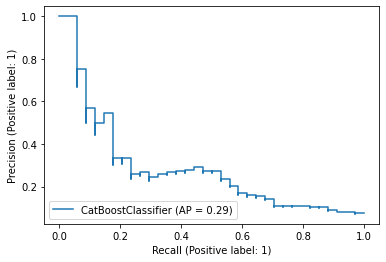

In [31]:
#precision recall curve
plot_precision_recall_curve(estimator=model3, X=X_test, y=y_test)

This precision recall curve is quite similar to the curve obtained from Random Forest classifier but is better than that as it's having a bit higher area under the curve stating the least false positive and false negative rates.

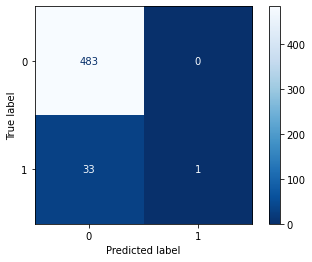

In [32]:
#confusion matrix
plot_confusion_matrix(estimator=model3, X=X_test, y_true=y_test, cmap='Blues_r')



The confusion matrix of this classifier is showing very less false predicted values among all models used here.


### At last, it can be concluded:
Out of three models used for this classification of hazardous and No-hazardous state, Catboost classifier algorithms and its model has been proven to be the best fitted model for this dataset. It attained 94% accuracy along with 0.21 log_loss which is better among all. Similar results are shown by Random Forest classifier also but its log-loss is comparatively higher among all. Therefore, Catboost Classifier is best for this seismic bumps dataset. The precision recall curve of catboost classifier is having highest area with least false positive and false negative rates, and the confusion matrix is also having better results with only 34 wrongly classified outputs.